## 데이터 집계와 그룹 연산

### 집계 연산(Aggregation)

|집계|설명|
|:--|:--|
|```count```|전체 갯수|
|```head, tail```|앞의 항목 일부 반환, 뒤의 항목 일부 반환|
|```describe```|Series, DataFrame의 각 컬럼에 대한 요약 통계|
|```min, max```|최소값, 최대값|
|```cummin, cummax```|누적 최소값, 누적 최대값|
|```argmin, argmax```|최소값과 최대값의 색인 위치|
|```idxmin, idxmax```|최소값과 최대값의 색인값|
|```mean, median```|평균값, 중앙값|
|```std, var```|표준편차, 분산|
|```skew```|왜도 값 계산|
|```kurt```|첨도 값 계산|
|```mad```|절대 평균 편차|
|```sum, cusum```|전체 항목 합, 누적합|
|```prod, cumprod```|전체 항목 곱, 누적곱|
|```quatile```|0부터 1까지의 분위수 계산(괄호안에 0.25, 0.5, 0.75 등의 숫자를 입력해야 함(기본값은 0.5))|
|```diff```|1차 산술차 계산|
|```pct_change```|퍼센트 변화율 계산|
|```corr, cov```|상관관계, 공분산 계산|

In [262]:
df = pd.DataFrame([[1, 1.2, np.nan],
                   [2.4, 5.5, 4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44, -3.1, 4.1]], 
                 index=[1, 2, 3, 4],
                 columns = ['A','B','C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,4.1


In [263]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1  4.1
2 2


In [264]:
dft = pd.DataFrame({'a':[1, 2, 3, 4],
                    'b':[8, 5, 6, 7],
                    'c':[10, 11, 9, 12]})
dft

,a,b,c
0,1,8,10
1,2,5,11
2,3,6,9
3,4,7,12


In [265]:
print(np.argmin(dft),np.argmax(dft))
# 최소값과 최대값의 index를 반환한다.

0 11


In [266]:
print(dft.idxmin())
print(dft.idxmax())
# 최소값이 있는 index(여기서 index는 색인 바로 columns이 아닌 것을 뜻한다)가 무엇인지를 알려준다
# 'a' column에 있는 '0' index에 가장 작은 값이 존재한다.
# 'a' column에 있는 '3' index에 가장 큰 값이 존재한다.

a    0
b    1
c    2
dtype: int64
a    3
b    0
c    3
dtype: int64


In [267]:
dft.take([0,1,2])

,a,b,c
0,1,8,10
1,2,5,11
2,3,6,9


In [268]:
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,4.1


In [269]:
print(df.skew())
print()
print(df.kurt())

A    1.15207
B    0.00000
C        NaN
dtype: float64

A   NaN
B   NaN
C   NaN
dtype: float64


In [270]:
dft

,a,b,c
0,1,8,10
1,2,5,11
2,3,6,9
3,4,7,12


왜도와 첨도란?<br>

왜도 값이 양의 값을 가지면 Data의 중심(평균)이 정규 분포보다 왼쪽으로 치우쳐져 있고<br>
(즉, 분포의 제일 높은 지점이 왼쪽에 있고)<br>
꼬리는 오른쪽으로 길어지게 표현된다. -> Right-skewed  
  
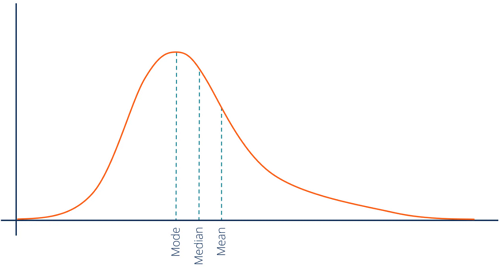 <br>
<br>
왜도 값이 음의 값을 가지면 Data의 중심(평균)이 정규 분포보다 오른쪽으로 치우쳐져 있고<br>
(즉, 분포의 제일 높은 지점이 오른쪽에 있고)<br>
꼬리는 왼쪽으로 늘어지게 표현된다. -> left-skewed<br>
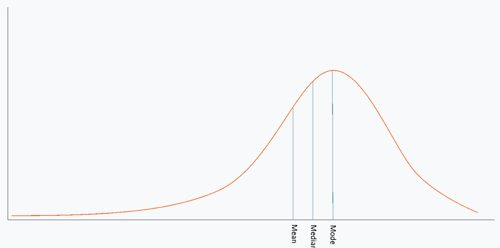 <br>
<br>
<br>
왜도 값이 -2 ~ 2 정도의 치우침은 왜도가 크지 않다고 판단한다. <br>
절대값 3미만이면 기준에 부합

첨도<br>
<br>

측정치의 빈도수를 나타낼 때 나타나는 분포의 뾰족한 형태를 "첨도"라고 함<br>
샘플의 점수가 평균을 중심으로 가까이 몰려 있을 수록 분포의 정점은 더욱 뾰족한 모양, 즉 첨도가 커진다.<br>
분포의 분산도가 크면 집단이 이질적이고 분포의 높이가 낮아지며, 분산도가 작으면 집단이 동질적이고 분포의 높이가 높아짐<br>
정규분포의 첨도는 0이며, 첨도가 0보다 크면 정규분포보다 더 뾰족한 모양을 갖는 고첨이 되고, <br>
첨도가 0보다 작으면 분포의 높이가 정규분포보다 낮아지는 저첨이 된다.<br>

<br>

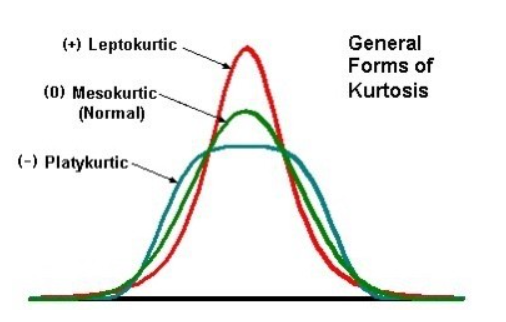

<br>
첨도가 절대값 7미만이면 기준에 부합하는 것으로 간주

In [271]:
print(dft.skew())
print()
print(dft.kurt())

a    0.0
b    0.0
c    0.0
dtype: float64

a   -1.2
b   -1.2
c   -1.2
dtype: float64


In [272]:
dff = pd.DataFrame({'A':[1, 1, 1,  120, 3, 92, 1, 120, 10000000],
                    'B':[50, 60, 70, 80, 90, 100, 110, 120, 130],
                    'C':np.random.randint(1, 100, (9))})
dff

,A,B,C
0,1,50,51
1,1,60,3
2,1,70,98
3,120,80,9
4,3,90,43
5,92,100,8
6,1,110,26
7,120,120,31
8,10000000,130,22


In [273]:
print(dff.skew()) 
# 'A'의 왜도의 절대값이 3이므로 왜도가 기준치보다 높다.
# 왼쪽으로 꼬리가 긴 그래프
# 'A'의 평균이 중앙값보다 크다.
print()
print(dff.A.mean() > dff.A.median())
print()
print(dff.kurt())

A    3.000000
B    0.000000
C    1.498262
dtype: float64

True

A    9.000000
B   -1.200000
C    2.634574
dtype: float64


In [274]:
print(dff.mad())

A    1.975300e+06
B    2.222222e+01
C    2.111111e+01
dtype: float64


In [275]:
dff.cumsum()

,A,B,C
0,1,50,51
1,2,110,54
2,3,180,152
3,123,260,161
4,126,350,204
5,218,450,212
6,219,560,238
7,339,680,269
8,10000339,810,291


In [276]:
dff.A.median()

3.0

In [277]:
dff.quantile()

A     3.0
B    90.0
C    26.0
Name: 0.5, dtype: float64

In [278]:
dff.corr()

,A,B,C
A,1.000000,0.547729,-0.131761
B,0.547729,1.000000,-0.274691
C,-0.131761,-0.274691,1.000000


In [279]:
dff.corrwith(dff.B)

A    0.547729
B    1.000000
C   -0.274691
dtype: float64

In [280]:
dff.cov()

,A,B,C
A,1.111102e+13,50000406.25,-1.291731e+07
B,5.000041e+07,750.00,-2.212500e+02
C,-1.291731e+07,-221.25,8.650000e+02


### GroupBy 연산

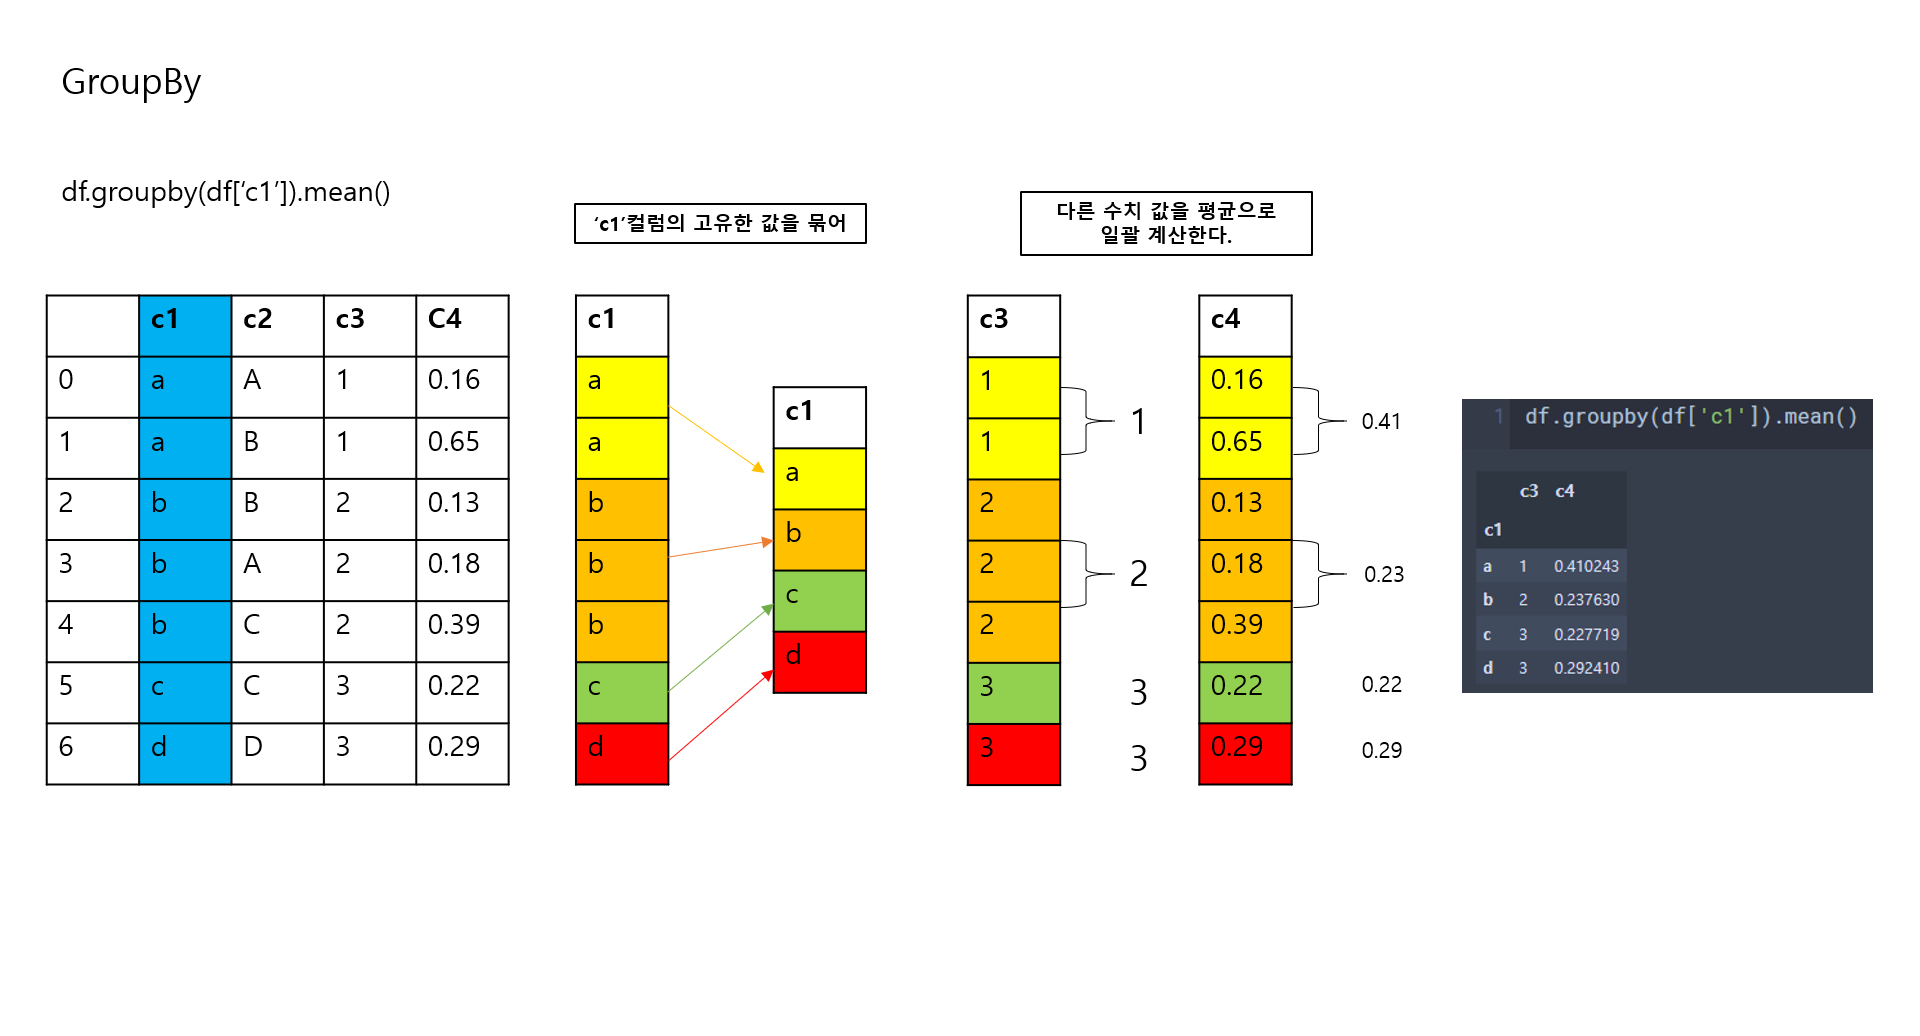

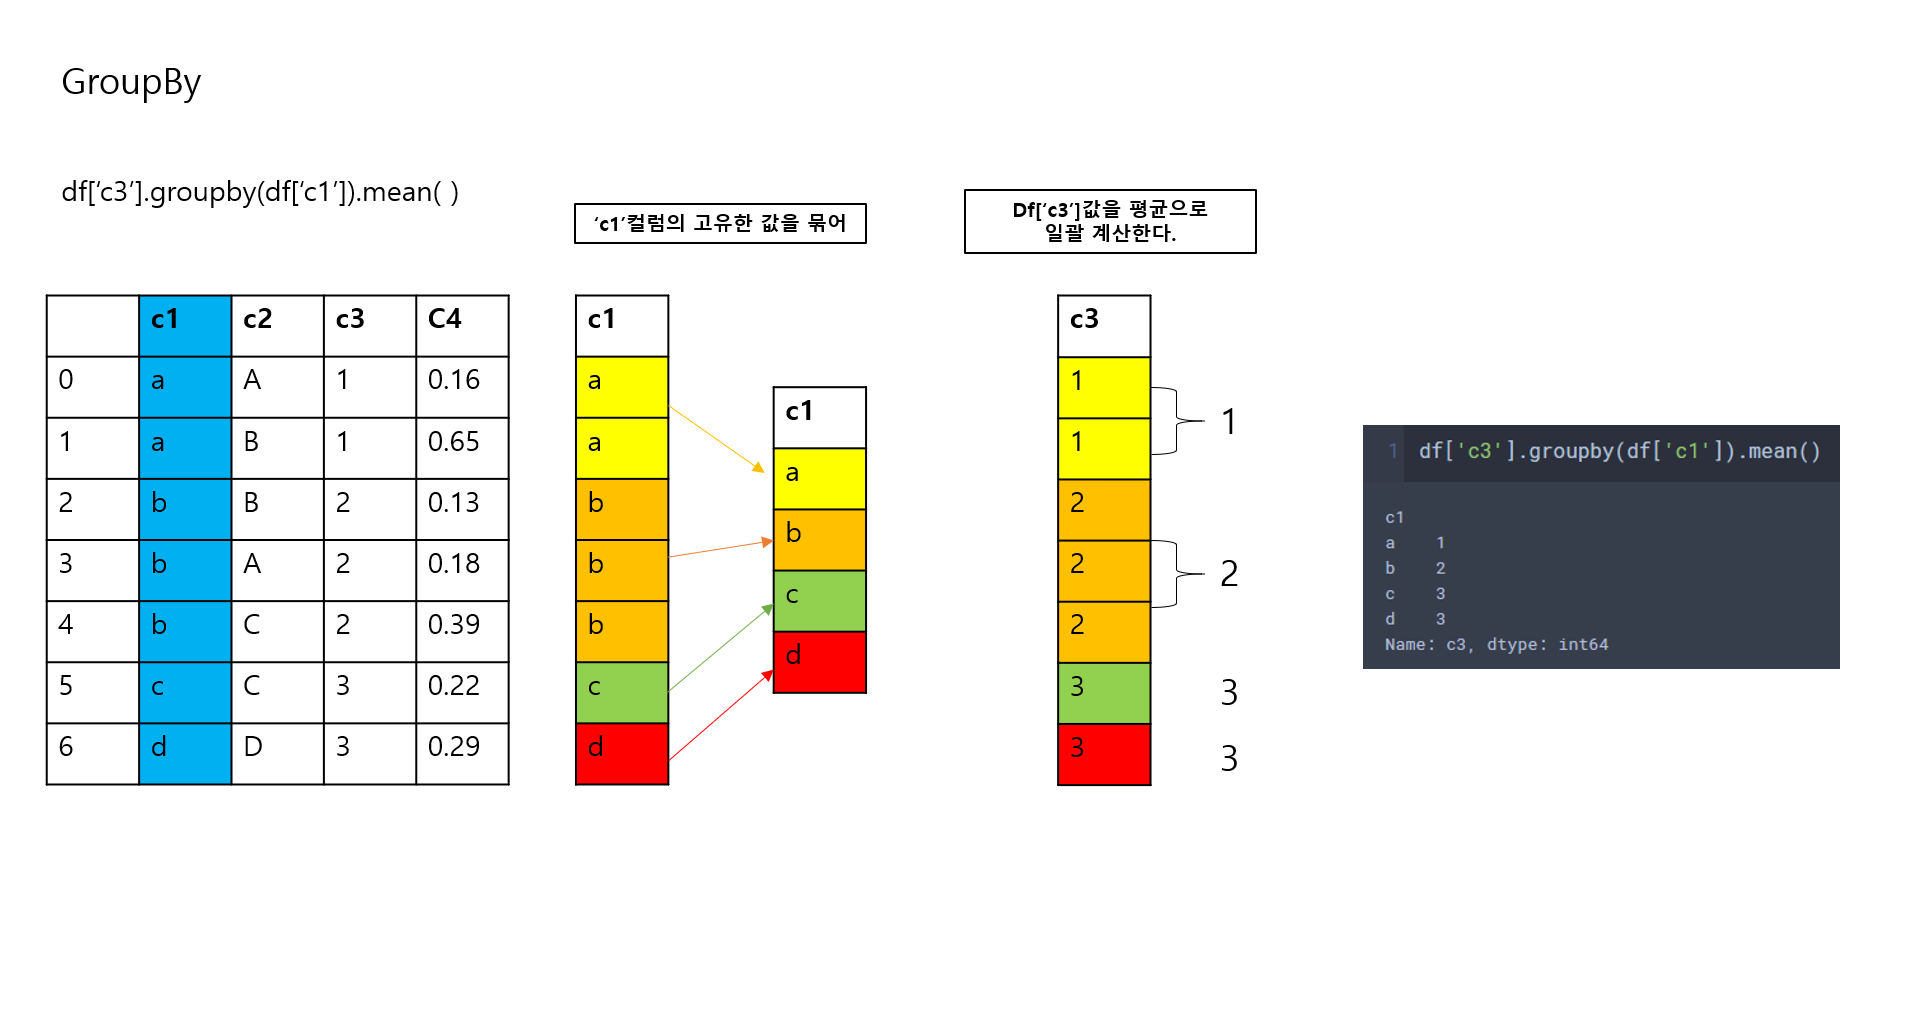

In [281]:
df = pd.DataFrame({'c1': ['a','a','b','b','b','c','d',],
                   'c2': ['A','B','B','A','C','C','D'],
                   'c3': [1, 1, 2, 2, 2, 3, 3],
                   'c4': np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,1,0.621984
1,a,B,1,0.446610
2,b,B,2,0.095139
3,b,A,2,0.436701
4,b,C,2,0.644481
5,c,C,3,0.999744
6,d,D,3,0.327931


In [282]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [283]:
df['c3'].groupby(df['c1']).mean()

c1
a    1
b    2
c    3
d    3
Name: c3, dtype: int64

In [284]:
df.groupby(df['c1']).mean()

,c3,c4
c1,,
a,1,0.534297
b,2,0.392107
c,3,0.999744
d,3,0.327931


In [285]:
df['c4'].groupby([df['c1'],df['c2']]).mean()

c1  c2
a   A     0.621984
    B     0.446610
b   A     0.436701
    B     0.095139
    C     0.644481
c   C     0.999744
d   D     0.327931
Name: c4, dtype: float64

In [286]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.621984,0.446610,NaN,NaN
b,0.436701,0.095139,0.644481,NaN
c,NaN,NaN,0.999744,NaN
d,NaN,NaN,NaN,0.327931


In [287]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.621984
    B     0.446610
b   A     0.436701
    B     0.095139
    C     0.644481
c   C     0.999744
d   D     0.327931
Name: c4, dtype: float64

In [288]:
df['c4'].groupby([df['c1'],df['c2']]).mean().to_frame()

c4
c1 c2          
a  A   0.621984
   B   0.446610
b  A   0.436701
   B   0.095139
   C   0.644481
c  C   0.999744
d  D   0.327931

In [289]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,1,0.534297
b,2,0.392107
c,3,0.999744
d,3,0.327931


In [290]:
df.groupby(['c1','c2']).mean()

c3        c4
c1 c2              
a  A    1  0.621984
   B    1  0.446610
b  A    2  0.436701
   B    2  0.095139
   C    2  0.644481
c  C    3  0.999744
d  D    3  0.327931

In [291]:
df.groupby(['c1','c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   C     1
d   D     1
dtype: int64

In [292]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   1  0.621984
1  a  B   1  0.446610
b
  c1 c2  c3        c4
2  b  B   2  0.095139
3  b  A   2  0.436701
4  b  C   2  0.644481
c
  c1 c2  c3        c4
5  c  C   3  0.999744
d
  c1 c2  c3        c4
6  d  D   3  0.327931


In [293]:
df.groupby(['c1','c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.621984
   B   0.446610
b  A   0.436701
   B   0.095139
   C   0.644481
c  C   0.999744
d  D   0.327931

In [294]:
df.groupby(['c1','c2'])['c4'].agg(['min','max','mean'])

min       max      mean
c1 c2                              
a  A   0.621984  0.621984  0.621984
   B   0.446610  0.446610  0.446610
b  A   0.436701  0.436701  0.436701
   B   0.095139  0.095139  0.095139
   C   0.644481  0.644481  0.644481
c  C   0.999744  0.999744  0.999744
d  D   0.327931  0.327931  0.327931

In [295]:
df.groupby(['c1','c2'], as_index=False).mean()

,c1,c2,c3,c4
0,a,A,1,0.621984
1,a,B,1,0.446610
2,b,A,2,0.436701
3,b,B,2,0.095139
4,b,C,2,0.644481
5,c,C,3,0.999744
6,d,D,3,0.327931


In [296]:
def top(df, n=3, column='c1'):
    
    return df.sort_values(by=column)[-n:]

top(df, n=5)

,c1,c2,c3,c4
2,b,B,2,0.095139
3,b,A,2,0.436701
4,b,C,2,0.644481
5,c,C,3,0.999744
6,d,D,3,0.327931


In [297]:
dff = pd.DataFrame({'국가': ['한국','미국','필리핀', '홍콩', '호주', '영국'],
                    '축구 점수': [5, 3, 2, 1, 4, 6],
                    '농구 점수': [1, 3, 2, 5, 6, 4],
                    '야구 점수': [3, 2, 5, 1, 4, 6]})
dff

,국가,축구 점수,농구 점수,야구 점수
0,한국,5,1,3
1,미국,3,3,2
2,필리핀,2,2,5
3,홍콩,1,5,1
4,호주,4,6,4
5,영국,6,4,6


In [298]:
dff['평균 순위'] = round((dff['축구 점수'] + dff['농구 점수'] + dff['야구 점수'])/3, 1)
dff

,국가,축구 점수,농구 점수,야구 점수,평균 순위
0,한국,5,1,3,3.0
1,미국,3,3,2,2.7
2,필리핀,2,2,5,3.0
3,홍콩,1,5,1,2.3
4,호주,4,6,4,4.7
5,영국,6,4,6,5.3


In [299]:
def Top_n(table, column, n=3):
    
    return table.sort_values(by=column, ascending=False)[-3:]

Top_n(dff, '축구 점수')

,국가,축구 점수,농구 점수,야구 점수,평균 순위
1,미국,3,3,2,2.7
2,필리핀,2,2,5,3.0
3,홍콩,1,5,1,2.3


In [300]:
Top_n(dff, '평균 순위')

,국가,축구 점수,농구 점수,야구 점수,평균 순위
2,필리핀,2,2,5,3.0
1,미국,3,3,2,2.7
3,홍콩,1,5,1,2.3


### 피벗 테이블 (Pivot Table)
|함수|설명|
|:-|:-|
|```values```|집계하려는 컬럼 이름 혹은 이름의 리스트. 기본적으로 모든 숫자 컬럼 집계|
|```index```|피벗테이블의 로우를 그룹으로 묶을 컬럼 이름이나 그룹 키|
|```columns```|피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키|
|```aggfunc```|집계 함수나 함수 리스트. 기본값으로 ```mean```이 사용|
|```fil_value```|결과 테이블에서 누락된 값 대체를 위한 값|
|```dropna```|True인 경우 모든 항목이 NA인 컬럼은 포함하지 않음|
|```margins```|부분 합이나 총계를 담기 위한 로우/컬럼 추가 여부. 기본값은 False|

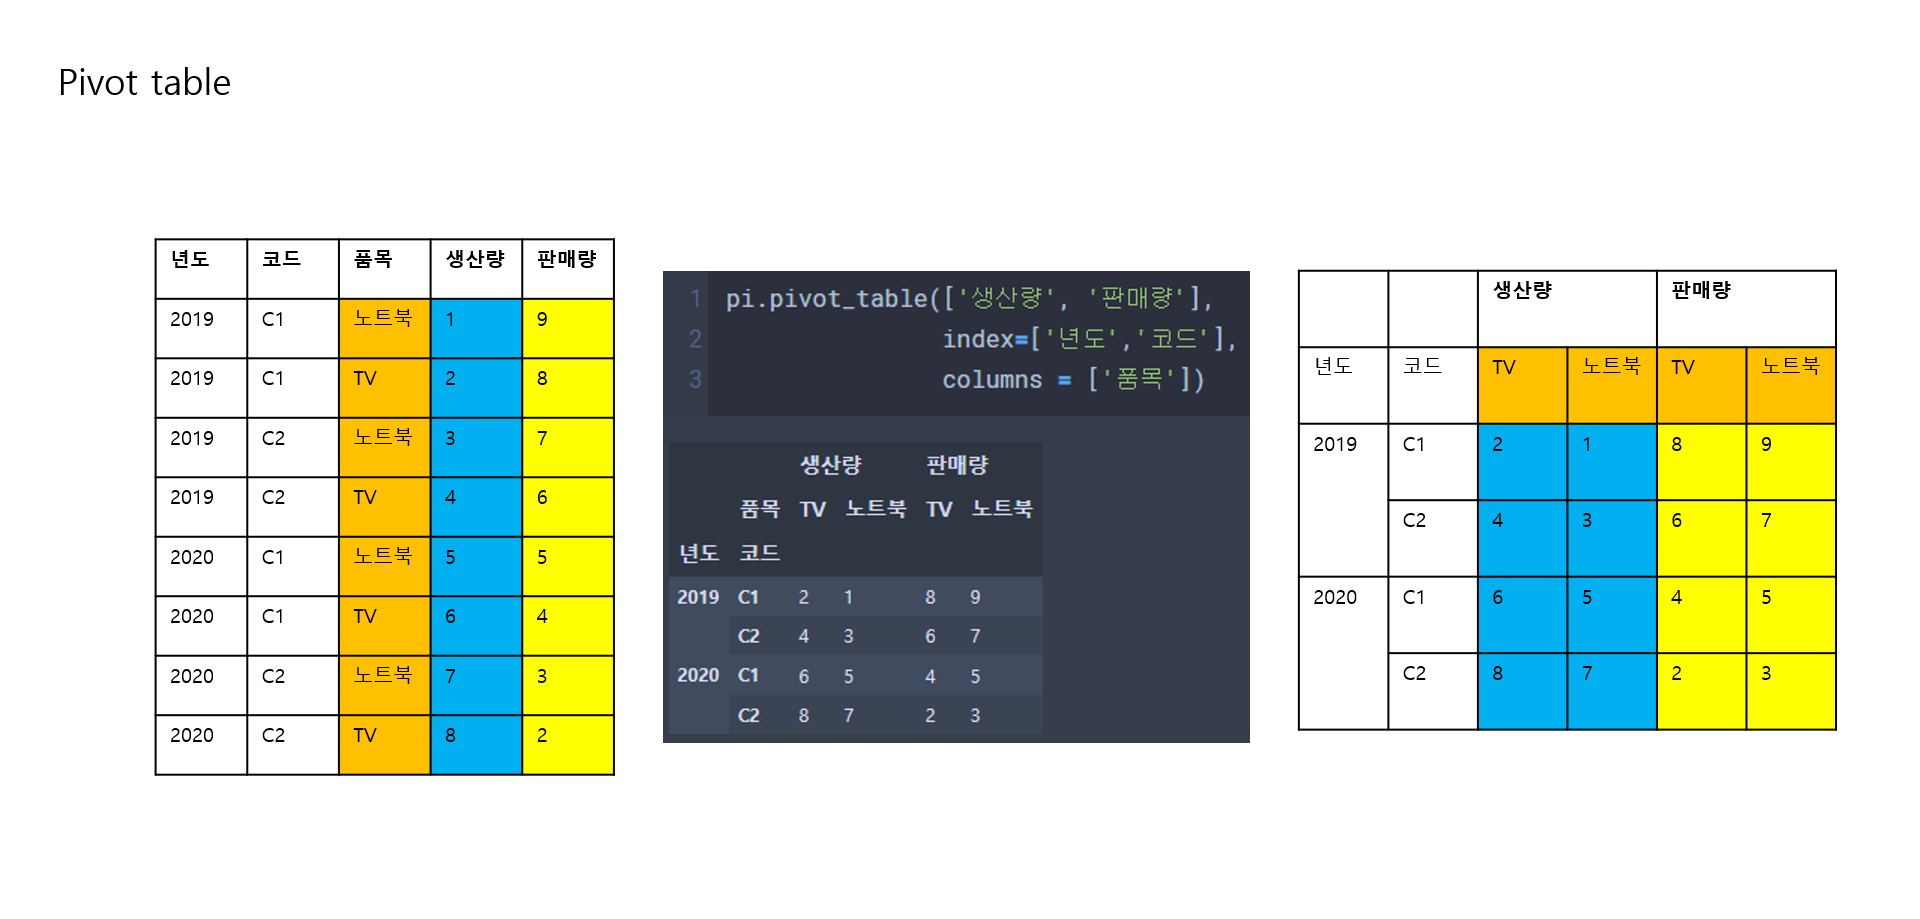

In [301]:
df

,c1,c2,c3,c4
0,a,A,1,0.621984
1,a,B,1,0.446610
2,b,B,2,0.095139
3,b,A,2,0.436701
4,b,C,2,0.644481
5,c,C,3,0.999744
6,d,D,3,0.327931


In [302]:
dft = pd.DataFrame({'국가': ['한국','미국','필리핀', '홍콩', '호주', '영국'],
                    '축구 점수': [1, 3, 2, 1, 4, 6],
                    '농구 점수': [1, 3, 2, 5, 6, 4],
                    '야구 점수': [1, 2, 5, 1, 4, 6]})
dft

,국가,축구 점수,농구 점수,야구 점수
0,한국,1,1,1
1,미국,3,3,2
2,필리핀,2,2,5
3,홍콩,1,5,1
4,호주,4,6,4
5,영국,6,4,6


In [303]:
dft.pivot_table(['축구 점수', '농구 점수'], index=['국가'],
               columns=['야구 점수'])

농구 점수                     축구 점수                    
야구 점수     1    2    4    5    6     1    2    4    5    6
국가                                                       
미국      NaN  3.0  NaN  NaN  NaN   NaN  3.0  NaN  NaN  NaN
영국      NaN  NaN  NaN  NaN  4.0   NaN  NaN  NaN  NaN  6.0
필리핀     NaN  NaN  NaN  2.0  NaN   NaN  NaN  NaN  2.0  NaN
한국      1.0  NaN  NaN  NaN  NaN   1.0  NaN  NaN  NaN  NaN
호주      NaN  NaN  6.0  NaN  NaN   NaN  NaN  4.0  NaN  NaN
홍콩      5.0  NaN  NaN  NaN  NaN   1.0  NaN  NaN  NaN  NaN

In [304]:
dft.pivot_table(['축구 점수', '농구 점수'], 
                index=['국가'],
                columns=['야구 점수'], 
                margins= True)

농구 점수                          축구 점수                              
야구 점수     1    2    4    5    6  All     1    2    4    5    6       All
국가                                                                      
미국      NaN  3.0  NaN  NaN  NaN  3.0   NaN  3.0  NaN  NaN  NaN  3.000000
영국      NaN  NaN  NaN  NaN  4.0  4.0   NaN  NaN  NaN  NaN  6.0  6.000000
필리핀     NaN  NaN  NaN  2.0  NaN  2.0   NaN  NaN  NaN  2.0  NaN  2.000000
한국      1.0  NaN  NaN  NaN  NaN  1.0   1.0  NaN  NaN  NaN  NaN  1.000000
호주      NaN  NaN  6.0  NaN  NaN  6.0   NaN  NaN  4.0  NaN  NaN  4.000000
홍콩      5.0  NaN  NaN  NaN  NaN  5.0   1.0  NaN  NaN  NaN  NaN  1.000000
All     3.0  3.0  6.0  2.0  4.0  3.5   1.0  3.0  4.0  2.0  6.0  2.833333

In [305]:
import random

date = ['2018', '2019', '2020'] *10 + ['2020']
date = pd.to_datetime(date)
date = date.to_period(freq='A')
date = pd.Series(date)

col = ['c1','c2','c3'] * 10 + ['c3']
random.shuffle(col)
col = pd.Series(col)

product = ['냉장고', 'TV','컴퓨터', '그래픽카드', '모니터'] * 6 + ['노트북']
random.shuffle(product)
product = pd.Series(product)

production = np.random.randint(800, 2000, 31)
production = pd.Series(production)
sell = np.random.randint(400, 900, 31)
sell = pd.Series(sell)

In [306]:
for_pivot = pd.concat([date, col, product, production, sell], axis=1)
for_pivot.columns=['날짜','코드', '품목', '출고','판매']
for_pivot.head()

,날짜,코드,품목,출고,판매
0,2018,c3,컴퓨터,1923,614
1,2019,c1,TV,1751,501
2,2020,c3,TV,1417,561
3,2018,c3,컴퓨터,1586,441
4,2019,c3,노트북,1135,537


In [307]:
for_pivot.pivot_table(['출고', '판매'],
                      index=['날짜','코드'],
                      columns=[ '품목'])

출고                                                  판매  \
품목           TV        그래픽카드     냉장고     노트북     모니터     컴퓨터     TV   
날짜   코드                                                               
2018 c1     NaN  1803.000000  1088.0     NaN  1652.0     NaN    NaN   
     c2   847.0   912.000000     NaN     NaN  1024.0     NaN  541.0   
     c3     NaN          NaN     NaN     NaN  1833.0  1754.5    NaN   
2019 c1  1751.0          NaN   856.0     NaN   955.0  1286.0  501.0   
     c2  1974.0          NaN  1620.0     NaN     NaN  1432.0  465.0   
     c3     NaN          NaN  1852.0  1135.0  1993.0     NaN    NaN   
2020 c1  1324.0          NaN     NaN     NaN     NaN  1580.5  508.0   
     c2  1095.0  1538.000000  1638.0     NaN     NaN     NaN  662.0   
     c3  1417.0  1615.666667     NaN     NaN     NaN     NaN  561.0   

                                                 
품목            그래픽카드    냉장고    노트북    모니터    컴퓨터  
날짜   코드                                          
2018 c1  781.000000  452.0    NaN  799.0    NaN  
     c2  754.000000    NaN    NaN  680.0    NaN  
     c3         NaN    NaN    NaN  716.5  527.5  
2019 c1         NaN  499.0    NaN  445.0  584.0  
     c2         NaN  684.0    NaN    NaN  500.0  
     c3         NaN  885.0  537.0  669.0    NaN  
2020 c1         NaN    NaN    NaN    NaN  736.5  
     c2  422.000000  518.5    NaN    NaN    NaN  
     c3  772.333333    NaN    NaN    NaN    NaN

In [308]:
for_pivot.pivot_table(['출고', '판매'],
                      index=['날짜','코드'],
                      columns=[ '품목'],
                      margins=True)

출고                                                 \
품목                TV        그래픽카드          냉장고     노트북          모니터   
날짜   코드                                                               
2018 c1          NaN  1803.000000  1088.000000     NaN  1652.000000   
     c2   847.000000   912.000000          NaN     NaN  1024.000000   
     c3          NaN          NaN          NaN     NaN  1833.000000   
2019 c1  1751.000000          NaN   856.000000     NaN   955.000000   
     c2  1974.000000          NaN  1620.000000     NaN          NaN   
     c3          NaN          NaN  1852.000000  1135.0  1993.000000   
2020 c1  1324.000000          NaN          NaN     NaN          NaN   
     c2  1095.000000  1538.000000  1638.000000     NaN          NaN   
     c3  1417.000000  1615.666667          NaN     NaN          NaN   
All      1401.333333  1516.666667  1448.666667  1135.0  1548.333333   

                                           판매                                 \
품목               컴퓨터          All          TV       그래픽카드         냉장고    노트북   
날짜   코드                                                                        
2018 c1          NaN  1514.333333         NaN  781.000000  452.000000    NaN   
     c2          NaN   927.666667  541.000000  754.000000         NaN    NaN   
     c3  1754.500000  1793.750000         NaN         NaN         NaN    NaN   
2019 c1  1286.000000  1212.000000  501.000000         NaN  499.000000    NaN   
     c2  1432.000000  1675.333333  465.000000         NaN  684.000000    NaN   
     c3          NaN  1660.000000         NaN         NaN  885.000000  537.0   
2020 c1  1580.500000  1495.000000  508.000000         NaN         NaN    NaN   
     c2          NaN  1477.250000  662.000000  422.000000  518.500000    NaN   
     c3          NaN  1566.000000  561.000000  772.333333         NaN    NaN   
All      1564.666667  1484.290323  539.666667  712.333333  592.833333  537.0   

                                   
품목         모니터    컴퓨터         All  
날짜   코드                            
2018 c1  799.0    NaN  677.333333  
     c2  680.0    NaN  658.333333  
     c3  716.5  527.5  622.000000  
2019 c1  445.0  584.0  507.250000  
     c2    NaN  500.0  549.666667  
     c3  669.0    NaN  697.000000  
2020 c1    NaN  736.5  660.333333  
     c2    NaN    NaN  530.250000  
     c3    NaN    NaN  719.500000  
All      671.0  602.0  620.774194

In [309]:
date = pd.to_datetime(['2018','2019','2020']).to_period(freq='A')
date = pd.Series(date)
code = pd.Series(['C1','C2','C3'])
product = pd.Series(['TV', '그래픽카드','노트북'])
production = pd.Series(np.random.randint(800, 2000, 3))
sell = pd.Series(np.random.randint(400, 900, 3))

for_pivot = pd.concat([date, code, product, production, sell], axis=1)
for_pivot.columns=['날짜','코드','품목','출고','판매']
for_pivot

,날짜,코드,품목,출고,판매
0,2018,C1,TV,926,595
1,2019,C2,그래픽카드,1767,737
2,2020,C3,노트북,1238,776


In [310]:
for_pivot.pivot_table(['출고','판매'],
                      index=['날짜','코드'],
                      columns=['품목'])

출고                     판매              
품목          TV   그래픽카드     노트북     TV  그래픽카드    노트북
날짜   코드                                            
2018 C1  926.0     NaN     NaN  595.0    NaN    NaN
2019 C2    NaN  1767.0     NaN    NaN  737.0    NaN
2020 C3    NaN     NaN  1238.0    NaN    NaN  776.0

In [311]:
midx = pd.MultiIndex.from_product([['2018','2019','2020'],['C1','C2','C3'],['TV','그래픽카드', '노트북']])
midx

MultiIndex([('2018', 'C1',    'TV'),
            ('2018', 'C1', '그래픽카드'),
            ('2018', 'C1',   '노트북'),
            ('2018', 'C2',    'TV'),
            ('2018', 'C2', '그래픽카드'),
            ('2018', 'C2',   '노트북'),
            ('2018', 'C3',    'TV'),
            ('2018', 'C3', '그래픽카드'),
            ('2018', 'C3',   '노트북'),
            ('2019', 'C1',    'TV'),
            ('2019', 'C1', '그래픽카드'),
            ('2019', 'C1',   '노트북'),
            ('2019', 'C2',    'TV'),
            ('2019', 'C2', '그래픽카드'),
            ('2019', 'C2',   '노트북'),
            ('2019', 'C3',    'TV'),
            ('2019', 'C3', '그래픽카드'),
            ('2019', 'C3',   '노트북'),
            ('2020', 'C1',    'TV'),
            ('2020', 'C1', '그래픽카드'),
            ('2020', 'C1',   '노트북'),
            ('2020', 'C2',    'TV'),
            ('2020', 'C2', '그래픽카드'),
            ('2020', 'C2',   '노트북'),
            ('2020', 'C3',    'TV'),
            ('2020', 'C3', '그래픽카드'),
            ('2020', 'C3',   '노트북')],


In [312]:
one = [[ int(i) for i in range(1, 28) ],[ int(i) for i in range(28, 1, -1)]]
three = pd.DataFrame({'one':[int(i) for i in range(1, 28)],
                       'two':[int(i) for i in range(28, 1, -1)]}, index = midx)
three = three.reset_index()
three.columns = ['년도', '코드','품목','생산량', '판매량']
three

,년도,코드,품목,생산량,판매량
0,2018,C1,TV,1,28
1,2018,C1,그래픽카드,2,27
2,2018,C1,노트북,3,26
3,2018,C2,TV,4,25
4,2018,C2,그래픽카드,5,24
5,2018,C2,노트북,6,23
6,2018,C3,TV,7,22
7,2018,C3,그래픽카드,8,21
8,2018,C3,노트북,9,20
9,2019,C1,TV,10,19


In [313]:
three.groupby(three.코드).sum()

,생산량,판매량
코드,,
C1,99,162
C2,126,135
C3,153,108


In [314]:
three.pivot_table(['생산량','판매량'],
                  index = ['년도','코드'],
                  columns=['품목'], 
                  margins=True)

생산량               판매량              
품목       TV 그래픽카드 노트북 All  TV 그래픽카드 노트북 All
년도   코드                                    
2018 C1   1     2   3   2  28    27  26  27
     C2   4     5   6   5  25    24  23  24
     C3   7     8   9   8  22    21  20  21
2019 C1  10    11  12  11  19    18  17  18
     C2  13    14  15  14  16    15  14  15
     C3  16    17  18  17  13    12  11  12
2020 C1  19    20  21  20  10     9   8   9
     C2  22    23  24  23   7     6   5   6
     C3  25    26  27  26   4     3   2   3
All      13    14  15  14  16    15  14  15

In [315]:
mdff = pd.MultiIndex.from_product([[2019, 2020], ['C1','C2'],['노트북','TV']])
mdff

MultiIndex([(2019, 'C1', '노트북'),
            (2019, 'C1',  'TV'),
            (2019, 'C2', '노트북'),
            (2019, 'C2',  'TV'),
            (2020, 'C1', '노트북'),
            (2020, 'C1',  'TV'),
            (2020, 'C2', '노트북'),
            (2020, 'C2',  'TV')],
           )

In [316]:
prod = [ i for i in range(1, 9) ]
sell = [ z for z in range(9, 1, -1) ]
pi = pd.DataFrame({'생산량':prod,
                   '판매량':sell},
                 index=mdff)
pi.reset_index(inplace=True)
pi.columns = ['년도', '코드','품목','생산량','판매량']
pi

,년도,코드,품목,생산량,판매량
0,2019,C1,노트북,1,9
1,2019,C1,TV,2,8
2,2019,C2,노트북,3,7
3,2019,C2,TV,4,6
4,2020,C1,노트북,5,5
5,2020,C1,TV,6,4
6,2020,C2,노트북,7,3
7,2020,C2,TV,8,2


In [317]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'])

생산량     판매량    
품목       TV 노트북  TV 노트북
년도   코드                
2019 C1   2   1   8   9
     C2   4   3   6   7
2020 C1   6   5   4   5
     C2   8   7   2   3

In [318]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'],
               margins = True,
               aggfunc = sum)

생산량         판매량        
품목       TV 노트북 All  TV 노트북 All
년도   코드                        
2019 C1   2   1   3   8   9  17
     C2   4   3   7   6   7  13
2020 C1   6   5  11   4   5   9
     C2   8   7  15   2   3   5
All      20  16  36  20  24  44

In [319]:
pi.pivot_table(['생산량', '판매량'],
               index=['년도','코드'],
               columns = ['품목'])

생산량     판매량    
품목       TV 노트북  TV 노트북
년도   코드                
2019 C1   2   1   8   9
     C2   4   3   6   7
2020 C1   6   5   4   5
     C2   8   7   2   3